In [15]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from cycler import cycler
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")

# Posterior parameter range

## Config

In [42]:
# site = "Mahurangi"
# post_case = rf"{site}-2024-03-30"
# pre_case = f"{site}-2024-03-22"

site = "Coweeta"
post_case = rf"{site}-2024-03-30"
pre_case = f"{site}-2024-03-23"

n_criteria = 3
quantiles = [5, 50, 95]
home_dir = r"G:\Shared drives\Ryoko and Hilary\SMSigxModel\analysis"
color = ["#bcbcbc", "#3388b6", "#ff993e"]
mpl.rcParams['axes.prop_cycle'] = cycler(color=color)

In [43]:
input_dir_post = os.path.join(home_dir, "4_GLUE_postrun", "results", post_case)
input_dir_pre = os.path.join(home_dir, "3_GLUE_prerun", "results", pre_case)
output_dir = r"G:\Shared drives\Ryoko and Hilary\SMSigxModel\figs\supplemental\revision"
# output_dir = os.path.join(home_dir, "5_post_analysis", "results", "GLUEpost_rev",post_case)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

senario_names = ['KGE on Flow', 'KGE on flow + KGE on soil moisture', 'KGE on flow + Soil moisture seasonal timing error']
senario_short_names = ['Scenario Reference', 'Scenario SM1', 'Scenario SM2']

In [44]:
data_types = {'KGE on Flow_Behavioral': 'bool', 'KGE on Soil_Behavioral': 'bool', 'GLUE_results_Behavioral': 'bool', 'SeasonTrans of Soil wet2dry_end_Behavioral':'bool'}
for i in range(1, n_criteria+1):
    _eval_results = pd.read_csv(os.path.join(input_dir_post, f'criteria_{i}', 'post_evaluations.csv'), index_col=0, dtype=data_types)
    _eval_results['criteria_id'] = i
    if i==1:
        eval_results = _eval_results
    else:
        eval_results = pd.concat([eval_results, _eval_results])

print(len(eval_results))
eval_results.head()

11842


,NSE on Flow,NSE on Soil,KGE on Flow,KGE on Soil,SeasonTrans of Soil dry2wet_start,SeasonTrans of Soil dry2wet_end,SeasonTrans of Soil wet2dry_start,SeasonTrans of Soil wet2dry_end,SeasonTrans of Soil dry2wet_start_raw,SeasonTrans of Soil dry2wet_end_raw,SeasonTrans of Soil wet2dry_start_raw,SeasonTrans of Soil wet2dry_end_raw,KGE on Flow_Behavioral,GLUE_results_Behavioral,criteria_id,KGE on Soil_Behavioral,SeasonTrans of Soil dry2wet_start_Behavioral,SeasonTrans of Soil dry2wet_end_Behavioral,SeasonTrans of Soil wet2dry_start_Behavioral,SeasonTrans of Soil wet2dry_end_Behavioral
run_id,,,,,,,,,,,,,,,,,,,,
10,0.671479,-1.994018,0.826615,0.465167,2.416168,13.741263,50.650912,8.159984,"[2.75970568228513, 1.6449905121698976, 2.84380...","[-39.013594115152955, 0.32315056677907705, -2....","[-44.47864288184792, -56.82318193698302, nan]","[10.80343109043315, 5.5165359899401665, nan]",True,True,1,NaN,NaN,NaN,NaN,NaN
24,0.562319,-0.091841,0.773812,0.651539,3.166769,13.050528,35.339045,8.932422,"[3.7594446297734976, 2.94138117833063, 2.79948...","[-38.12667505303398, 1.032422152813524, -2.057...","[-14.129059406463057, -56.54903115471825, nan]","[12.80365026043728, 5.06119279935956, nan]",True,True,1,NaN,NaN,NaN,NaN,NaN
25,0.371449,0.029227,0.549353,0.592228,2.777939,13.281652,40.644254,8.933862,"[3.173954822588712, 2.2352128932252526, 2.9246...","[-38.411882555577904, 0.4350308268330991, -1.8...","[-23.721537567209452, -57.56697013601661, nan]","[11.803489870857447, 6.064233574084938, nan]",True,True,1,NaN,NaN,NaN,NaN,NaN
28,0.549372,-4.313917,0.755597,0.469659,3.460621,12.512651,26.470821,8.698136,"[3.759650172665715, 3.594781929627061, 3.02743...","[-37.30030454369262, 1.5433833221904933, -1.78...","[4.468131049536169, -57.409772507380694, nan]","[11.803510445170105, 5.592762513551861, nan]",True,True,1,NaN,NaN,NaN,NaN,NaN
36,0.698378,-1.176131,0.833616,0.516554,2.470818,13.864940,49.222413,7.844727,"[2.7596389749087393, 1.9771243347786367, 2.675...","[-38.967643299140036, 0.17079756828024983, -2....","[-42.34546882426366, -56.099357871804386, nan]","[10.80351474462077, 4.885939042083919, nan]",True,True,1,NaN,NaN,NaN,NaN,NaN


In [45]:
eval_results.groupby("criteria_id").count()["GLUE_results_Behavioral"]

criteria_id
1    6424
2    3205
3    2213
Name: GLUE_results_Behavioral, dtype: int64

In [46]:
param_pre = pd.read_csv(os.path.join(input_dir_pre, 'prior_parameters.csv'), index_col=0)
print(len(param_pre))
param_pre.head()

100000


,bb,satdk,slop,smcmax,wltsmc,max_gw_storage,expon
run_id,,,,,,,
0,2.341979,0.002253,0.048282,0.969005,1.571902e-07,0.167361,5.570526
1,1.606484,0.001296,0.062318,0.903941,2.176294e-07,0.190206,5.280435
2,3.623127,0.012037,0.012840,0.937597,2.314077e-07,0.175343,2.523418
3,3.623835,0.003701,0.074858,0.939855,1.715839e-07,0.148338,4.079324
4,4.784123,0.008153,0.009566,0.838237,1.851567e-07,0.206514,2.403062


In [47]:
df = eval_results.join(param_pre, how="left")
print(len(df))
df.head()

11842


,NSE on Flow,NSE on Soil,KGE on Flow,KGE on Soil,SeasonTrans of Soil dry2wet_start,SeasonTrans of Soil dry2wet_end,SeasonTrans of Soil wet2dry_start,SeasonTrans of Soil wet2dry_end,SeasonTrans of Soil dry2wet_start_raw,SeasonTrans of Soil dry2wet_end_raw,...,SeasonTrans of Soil dry2wet_end_Behavioral,SeasonTrans of Soil wet2dry_start_Behavioral,SeasonTrans of Soil wet2dry_end_Behavioral,bb,satdk,slop,smcmax,wltsmc,max_gw_storage,expon
run_id,,,,,,,,,,,,,,,,,,,,,
10,0.671479,-1.994018,0.826615,0.465167,2.416168,13.741263,50.650912,8.159984,"[2.75970568228513, 1.6449905121698976, 2.84380...","[-39.013594115152955, 0.32315056677907705, -2....",...,NaN,NaN,NaN,2.265009,0.001455,0.012109,0.850266,2.278484e-07,0.193392,2.086511
24,0.562319,-0.091841,0.773812,0.651539,3.166769,13.050528,35.339045,8.932422,"[3.7594446297734976, 2.94138117833063, 2.79948...","[-38.12667505303398, 1.032422152813524, -2.057...",...,NaN,NaN,NaN,3.648069,0.000407,0.028403,0.862517,2.322324e-07,0.184855,4.827842
24,0.562319,-0.091841,0.773812,0.651539,3.166769,13.050528,35.339045,8.932422,"[3.7594446297734976, 2.94138117833063, 2.79948...","[-38.12667505303398, 1.032422152813524, -2.057...",...,NaN,NaN,NaN,3.648069,0.000407,0.028403,0.862517,2.322324e-07,0.184855,4.827842
25,0.371449,0.029227,0.549353,0.592228,2.777939,13.281652,40.644254,8.933862,"[3.173954822588712, 2.2352128932252526, 2.9246...","[-38.411882555577904, 0.4350308268330991, -1.8...",...,NaN,NaN,NaN,2.905116,0.000809,0.032284,0.769755,1.596557e-07,0.196759,4.315734
25,0.371449,0.029227,0.549353,0.592228,2.777939,13.281652,40.644254,8.933862,"[3.173954822588712, 2.2352128932252526, 2.9246...","[-38.411882555577904, 0.4350308268330991, -1.8...",...,NaN,NaN,NaN,2.905116,0.000809,0.032284,0.769755,1.596557e-07,0.196759,4.315734


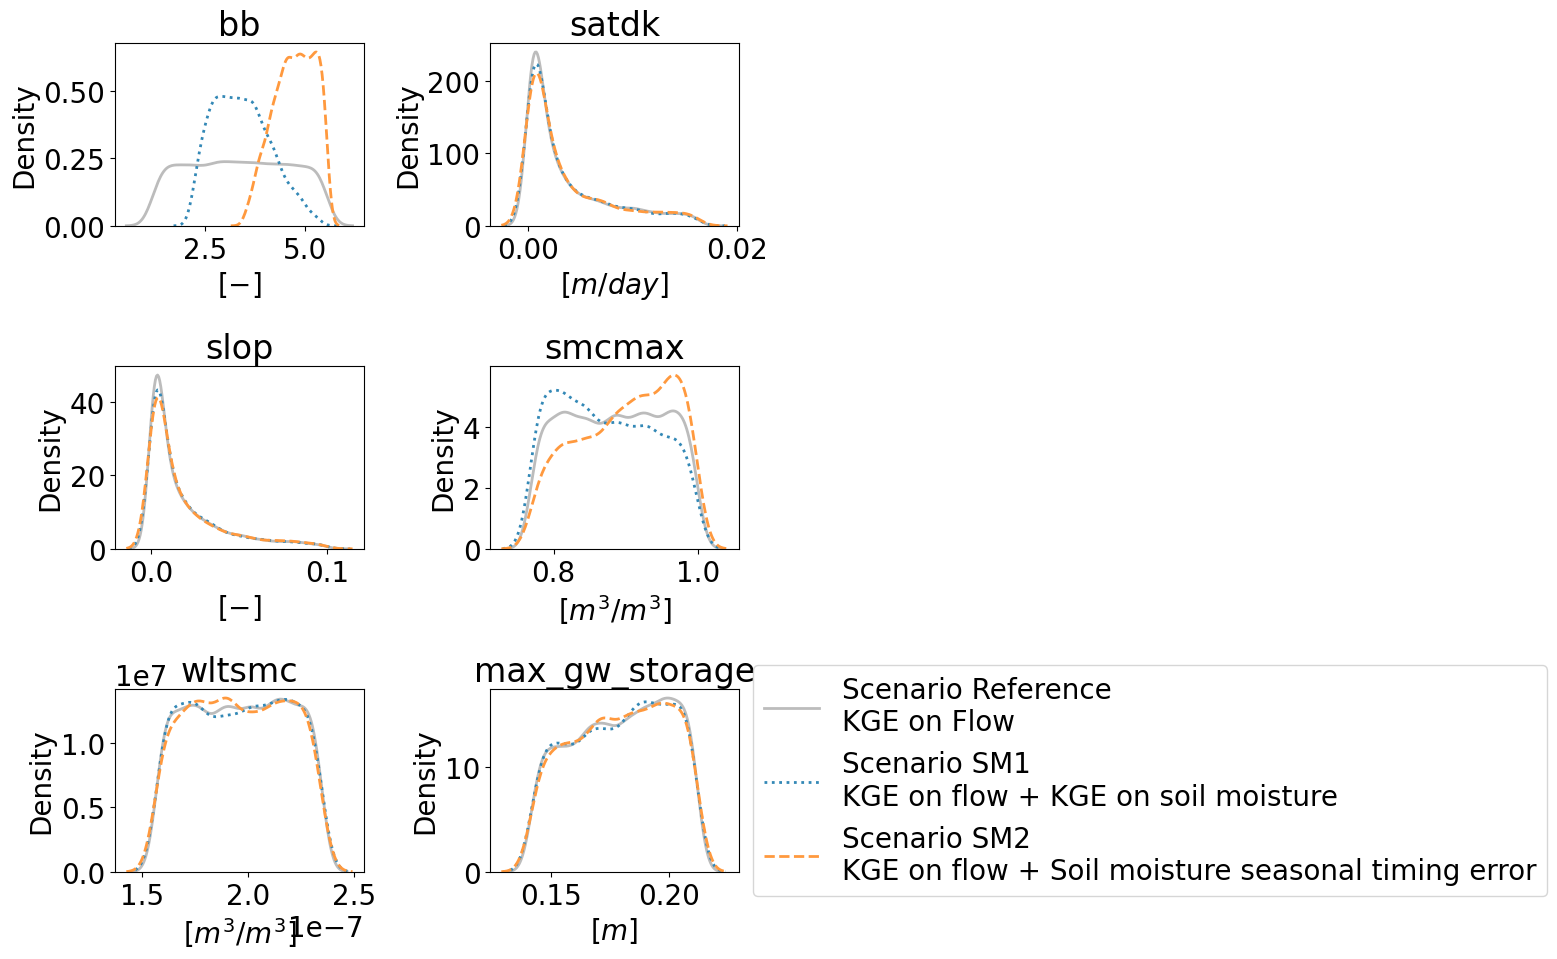

In [48]:
# Create a mapping between fig_title and eval_results_names

params = ['bb',	'satdk',	'slop'	,'smcmax'	,'wltsmc'	,'max_gw_storage']
param_unit = [r'$[-]$',	r'$[m/day]$',	r'$[-]$'	,r'$[m^3/m^3]$'	,r'$[m^3/m^3]$',r'$[m]$']
num_params = len(params)
fig, axs = plt.subplots(3, 2, figsize=(8, 10))

# Iterate over the metrics
for idx, param in enumerate(params):
    row, col = divmod(idx, 2)  # Convert 1D index to 2D index
    ax = axs[row, col]  # Access the correct subplot

    plt.rc('font', size=20)

    # Iterate over criteria
    for i in range(1, n_criteria+1):
        x = df[param][df['criteria_id'] == i].values

        #plot CDF
        if i == 1:
            linestyle='-'
        elif i== 2:
            linestyle=':'
        elif i==3:
            linestyle = '--'

        sns.kdeplot(x, ax=ax, fill=False, linestyle=linestyle, linewidth=2, label=f"{senario_short_names[i-1]}\n{senario_names[i-1]}")
        # ax.hist(x, alpha=0.75, label=f"{senario_short_names[i-1]}\n{senario_names[i-1]}", linestyle=linestyle)
        # ax.plot(x, y, label=f"{senario_short_names[i-1]}\n{senario_names[i-1]}", linewidth=5, alpha=0.7, linestyle=linestyle)
        
    ax.set_title(param)
    ax.set_xlabel(f'{param_unit[idx]}')
    ax.set_ylabel(f'Density')

fig.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


fig.savefig(os.path.join(output_dir, f'param_dist_{site}.pdf'), dpi=600, bbox_inches='tight')


# Intersection of different criteria

# Water balance components

# NSE vs KGE 